In [45]:
#First imported Pandas and Numpy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
#Enabled Graphs and plots in Jupyter Notebok
%matplotlib inline

# Reading Data Set Provided in Jupyter Notebook

In [46]:
#Reading the Data Fram downloaded as .csv file
project=pd.read_csv("Project_1.csv")

Exploring of Data Set and its various aspects

In [47]:
#Checking the Shape of the Data Set
project.shape

(180, 9)

In [48]:
#Looking at the first 5 Rows and  all Columns in Data Set
project.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


**Observations**
* There are total 180 Rows and 9 Columns
* Column 'Product' contains Model of the Product
* Column 'Gender' consists of categories of Male and Female users
* Column 'MaritalStatus' has the categories of 'Signle' or 'Partnered'
* Rest of the Columns consist of Numerical Values


Lets check now the Last 5 Rows of the Data Set to verify the above observations again

In [49]:
#Reading last 5 of Rows and Columns of the Data Frame(Project)
project.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


# An overall view of the DataFrame 'project'

In [50]:
#Summary Information on Data set 
#showing there are 3 columns with object dtypes and rest in int. form
project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**Observations**
* All Columns have 180 observations and no column is mssing any values
* Column of 'Product', 'Gender' and 'MaritalStatus' are categorical variables. All other columns have numerical values
* Total memory used by the Data Frame is 12.8+KBs

In [51]:
# categorical column should be converted to categorical type 
# (It reduces the data space required to store the dataframe, 
# every class in the categorical column will be represented by a number under the hood.
# This is useful during model building)

project['Product'] = project.Product.astype('category')
project['Gender'] = project.Gender.astype('category')
project['MaritalStatus']=project.MaritalStatus.astype('category')

In [52]:
# Dataframe object columns have been converted to category below
project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.4 KB


In [53]:
#describing the data will show us only the numerical values with column 
#Include='all' will show each column wil NaN values as Not a Number
#Rule of 5
#'unique' row shows how many unique values are in each categorical column 
project.describe(include='all')


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [54]:
#Another way of looking at the Range index 
project.index

RangeIndex(start=0, stop=180, step=1)

# EDA

# Exploring the Numerical Varialble

In [55]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

/Users/muzammilhussain/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/muzammilhussain/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


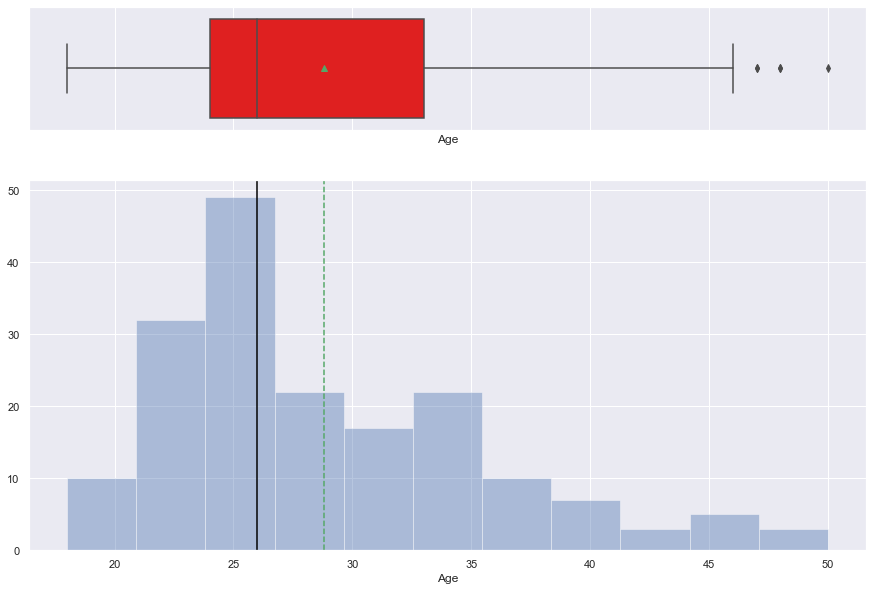

In [56]:
histogram_boxplot(project.Age)

**Observation**
* Age has Outliers and Data has right skewness
* Median is shown with Black line and mean is indicated with dotted vertical line

/Users/muzammilhussain/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/muzammilhussain/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


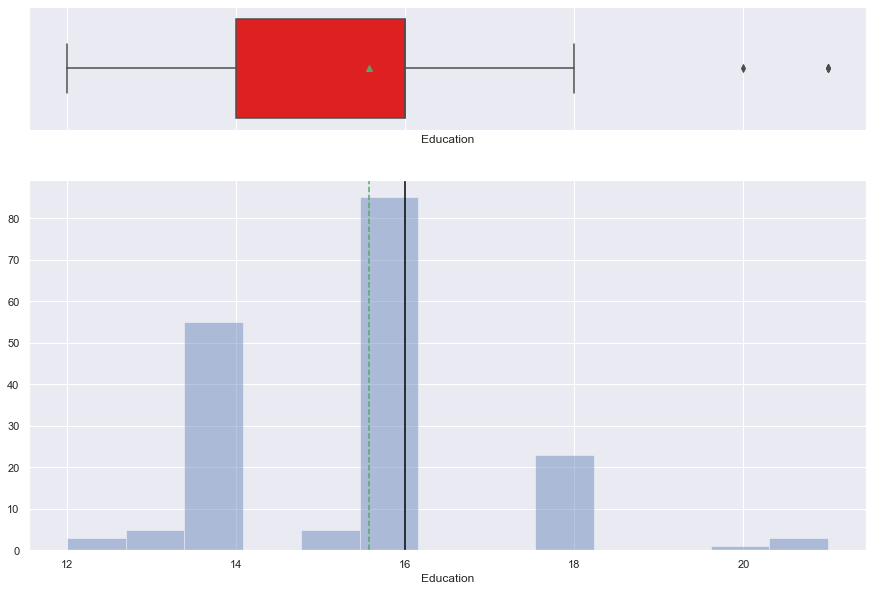

In [57]:
histogram_boxplot(project.Education)# Variable Education

**Observations**
* We can see some outliars on the right but the average education of the product user is about 16 years. 
* Median and mean lines show close  Middle and Average value of Educstion

/Users/muzammilhussain/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/muzammilhussain/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


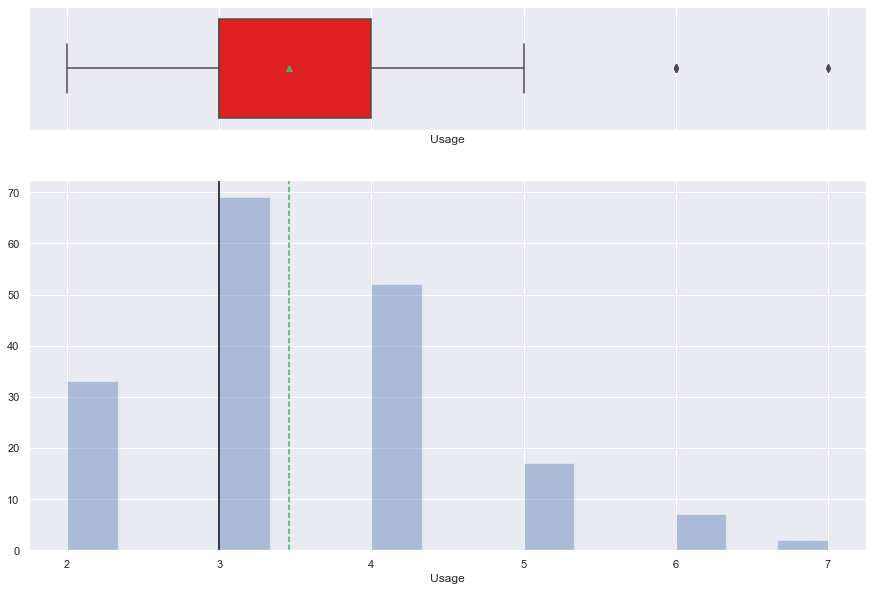

In [58]:
histogram_boxplot(project.Usage)# plot of Usage variable

**Observations**
* Middle value of the usage is about 3 and there are also some outliars on the right side distribution on the Data. 
* There is skeness and outliners to the right of the DataFrme

/Users/muzammilhussain/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/muzammilhussain/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


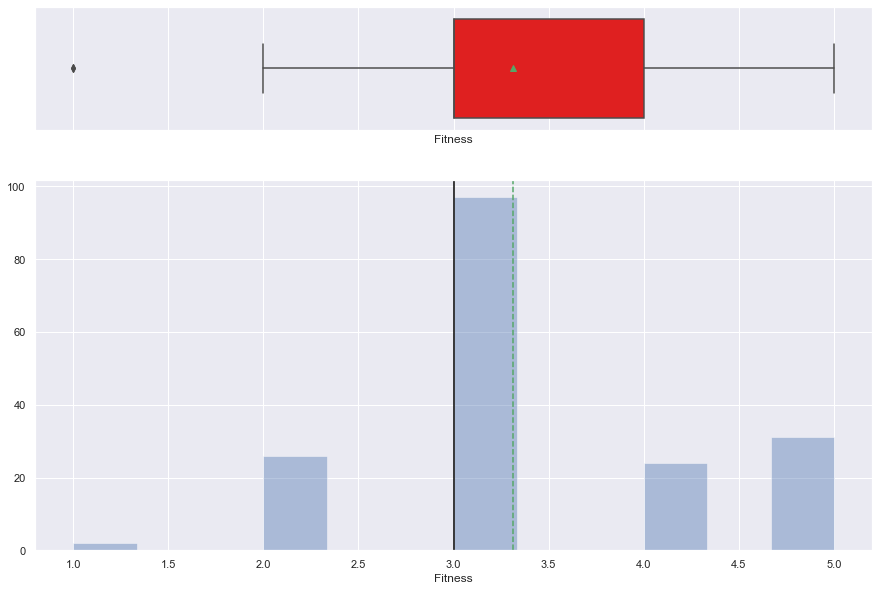

In [59]:
histogram_boxplot(project.Fitness)# Fitness Variable

**Observations**
* Customers have provided around 3 points on average score and outliars can be seen on the left

/Users/muzammilhussain/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/muzammilhussain/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


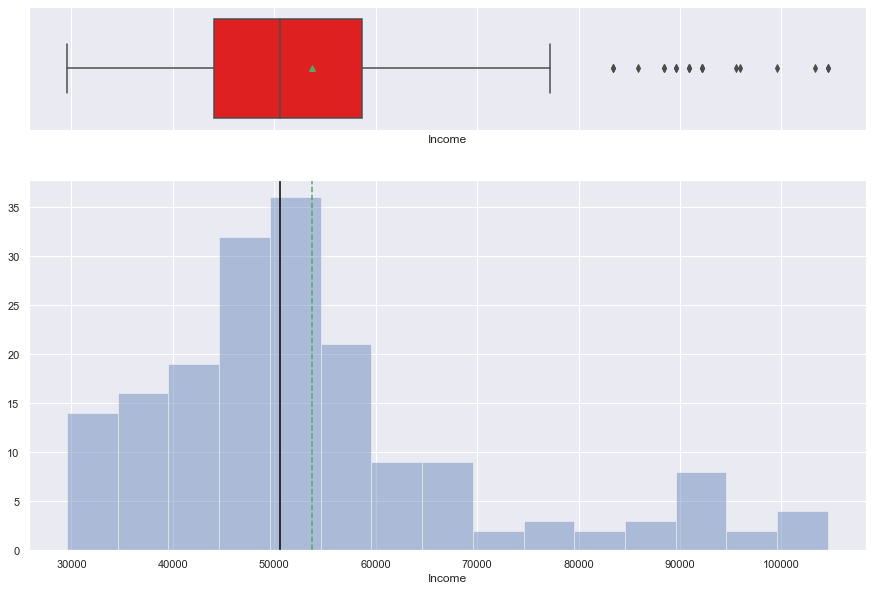

In [60]:
histogram_boxplot(project.Income)# variable income

**Observations**
* On the income data we can clearly see many outliar on the right side
* Data distribution shows average income of the customers around 50,000

/Users/muzammilhussain/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/muzammilhussain/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


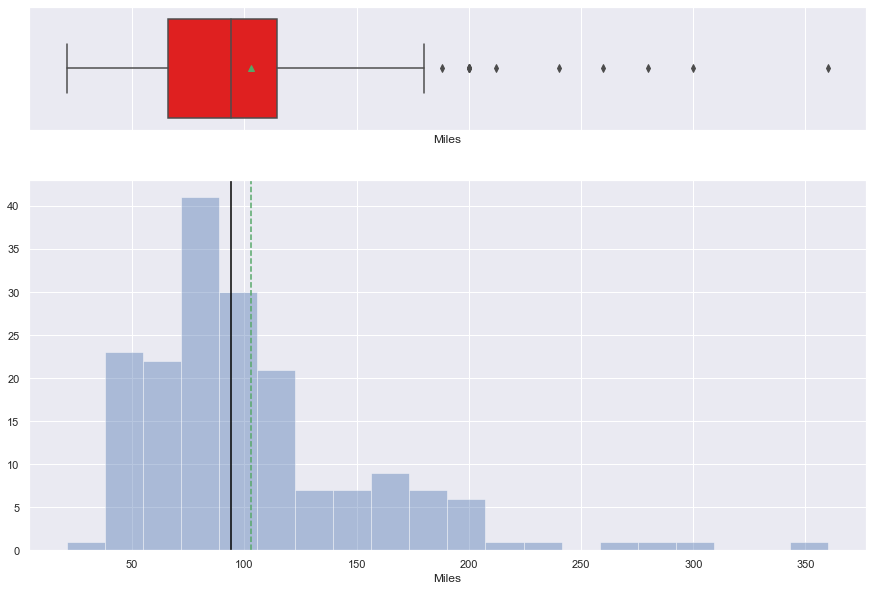

In [61]:
histogram_boxplot(project.Miles)

**Observations**
* Customers have atributed aproximate 100+ miles on average run on each Model of the product.
* There are many outliars on the right side distribution of the data.

# Let's explore the categorical variables now

In [62]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

/Users/muzammilhussain/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


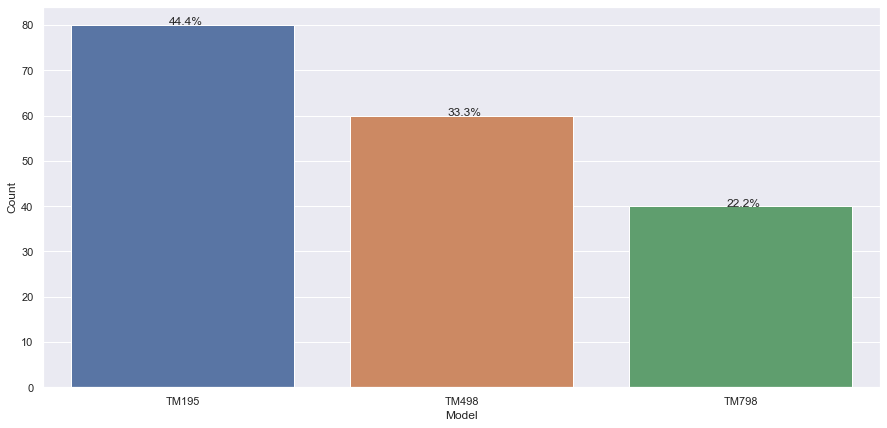

In [63]:
plt.figure(figsize=(15,7))
ax = sns.countplot(project['Product'])
plt.xlabel('Model')
plt.ylabel('Count')
bar_perc(ax,project['Product'])

**Observations**
* Count plot shows that customers buy TM195 more while TM798 has least purchases

/Users/muzammilhussain/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


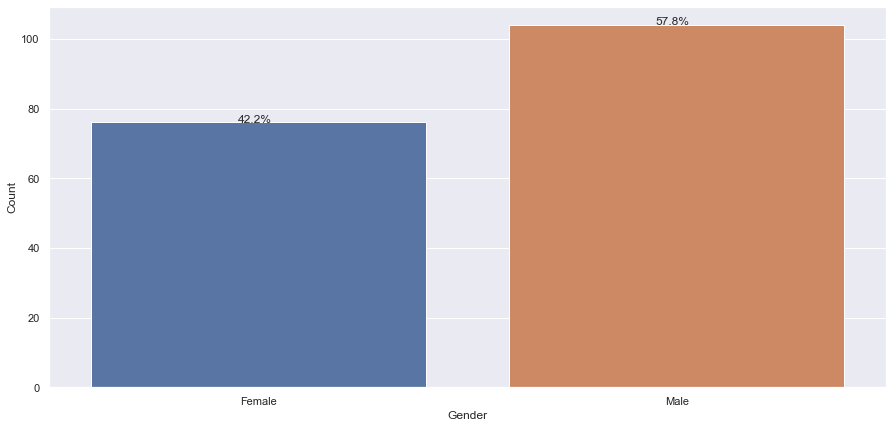

In [64]:
plt.figure(figsize=(15,7))
ax = sns.countplot(project['Gender'])
plt.xlabel('Gender')
plt.ylabel('Count')
bar_perc(ax,project['Gender'])

**Observations**
* On the Gender Scale, overall more purchases are done by male as compared to female.

/Users/muzammilhussain/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


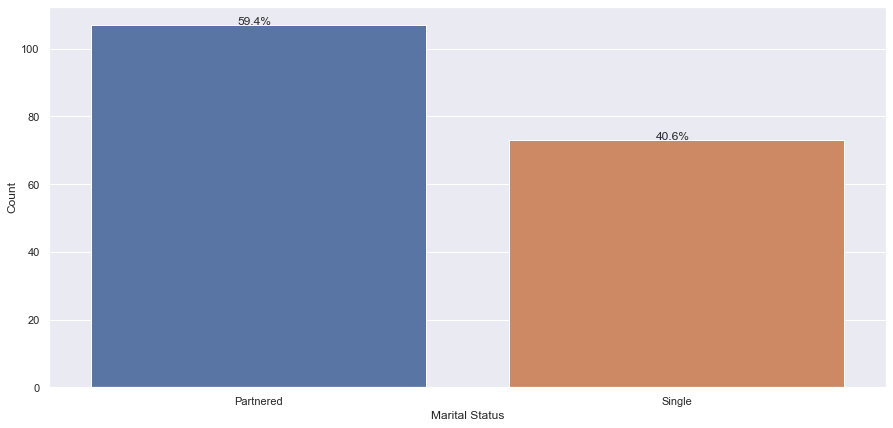

In [65]:
plt.figure(figsize=(15,7))# Shows the size of the figure
ax = sns.countplot(project['MaritalStatus'])#for showing column data
plt.xlabel('Marital Status')# shwoing lable on X axis
plt.ylabel('Count') #Shwoing Y axis lable
bar_perc(ax,project['MaritalStatus'])

**Observations**
* Partnered customers have more purchases as compared to Single

# Multivariate Analysis

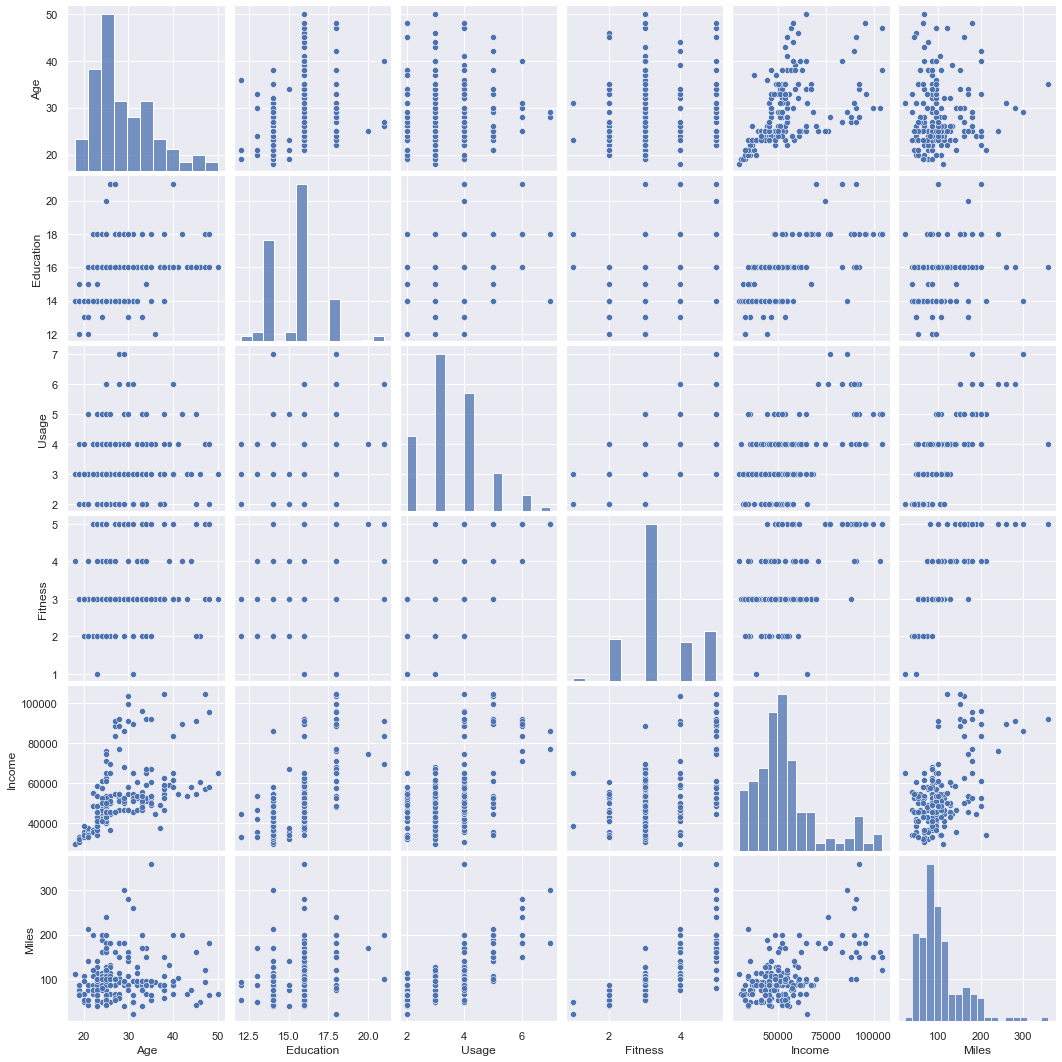

In [66]:
#using pair plot to grid all numeric variables
sns.pairplot(project)

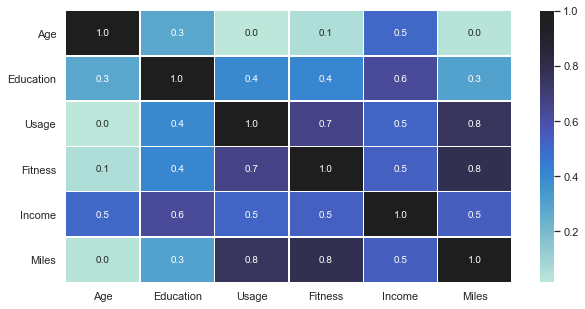

In [67]:
# Finding correlation through Heatmap. Dark colors show strong relationship  
plt.figure(figsize=(10,5))
sns.heatmap(project.corr(),annot=True,linewidths=.5,fmt='.1f', center=1)
plt.show()

**Observations**
* Miles has high correlation with Fitness and Usage.
* Usage and Fitness also has high correlation 

In [68]:
project.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


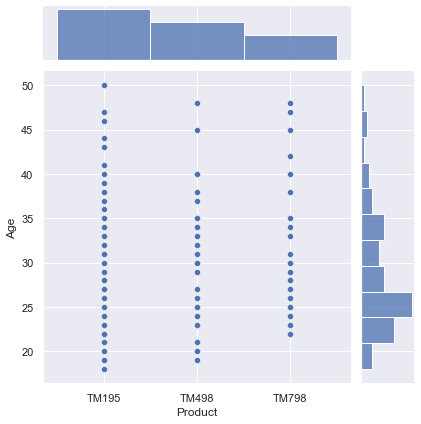

In [69]:
# Comparing Products and Age
sns.jointplot(data = project, x = 'Product', y = 'Age');

**Observations**
* Product TM195 has been more popular amongst all ages customers

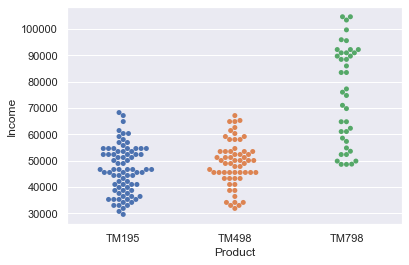

In [70]:
# Comparing Products and Income
sns.swarmplot(data = project, x = 'Product', y = 'Income');

**Observations**
* Product TM798 had been purchased by high income while product TM195 max incom bracket around 70000 and has more purchases than other two product models.

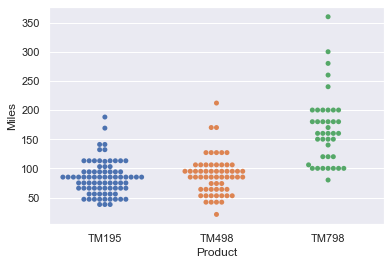

In [71]:
# Comparing Products and Miles
sns.swarmplot(data = project, x = 'Product', y = 'Miles');

**Observations**
* Product TM798 is expected run miles higher than other two.

# Numerical Variable vs Two Categorical  variables 

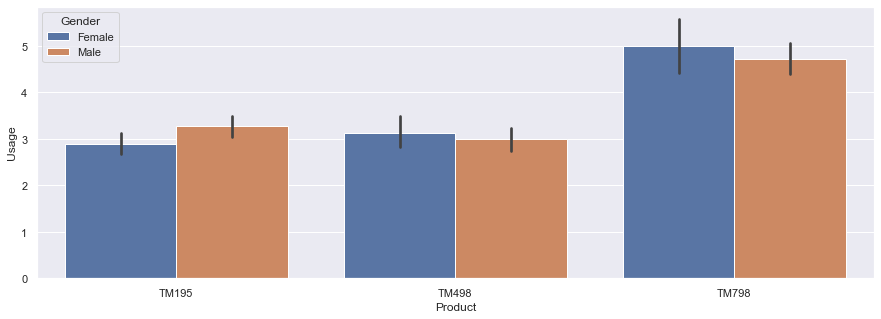

In [72]:
plt.figure(figsize=(15,5))# figure size is defined here
sns.barplot(data=project,x='Product',y='Usage',hue='Gender')# Comparing 2 Categorical and 1 Numeric variable
plt.show()

**Observations**
* Female are more interested in using Product Model TM798
* Male side is also more interested in using TM798. So Usage of TM798 is equally popular amongst both genders.

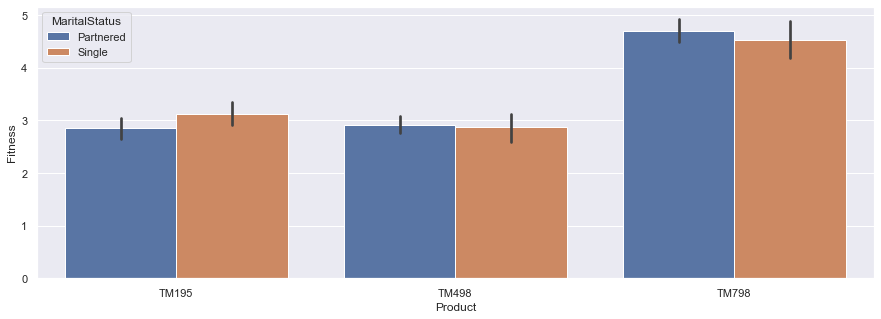

In [73]:
plt.figure(figsize=(15,5))# size of the display
sns.barplot(data=project,x='Product',y='Fitness',hue='MaritalStatus')# Variables
plt.show()

**Observations**
* Multivariate analysis of Marital Status, Fitness and Product shows that TM798 is more popular in Partners in the light of fitness points sacle of 5. 

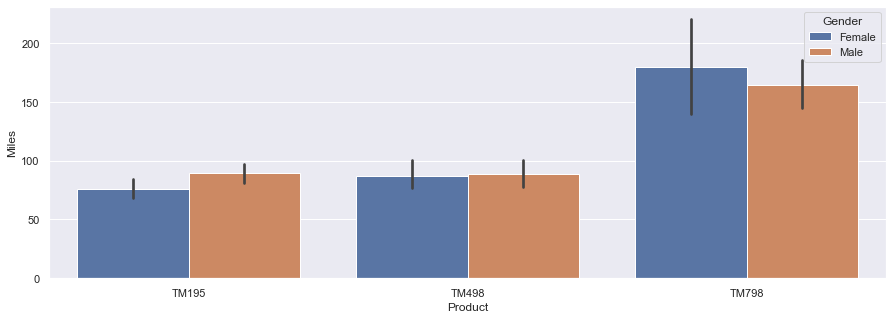

In [74]:
plt.figure(figsize=(15,5))
sns.barplot(data=project,x='Product',y='Miles',hue='Gender')
plt.show()

**Observations**
* Prouct Model TM798 shows that Female customer are expecting to run overall more miles while Male customers least to run on Product TM195 and more . Product TM498 shows pretty equal miles expected to be run on it from both genders.

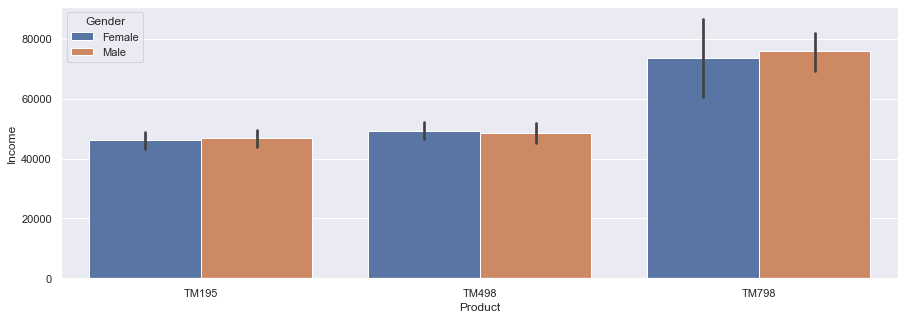

In [75]:
plt.figure(figsize=(15,5))
sns.barplot(data=project,x='Product',y='Income',hue='Gender')
plt.show()

**Observations**
* Income shows that Male customers are more interested in buying product TM798 and other 2 models are pretty much closer to the threashhold of 50000/month.
* Product TM498 and TM195 are pretty much equally popular in both Genders in context of their income
* Product Model TM798 here again shows the attribute of male customers with high income as compared to female

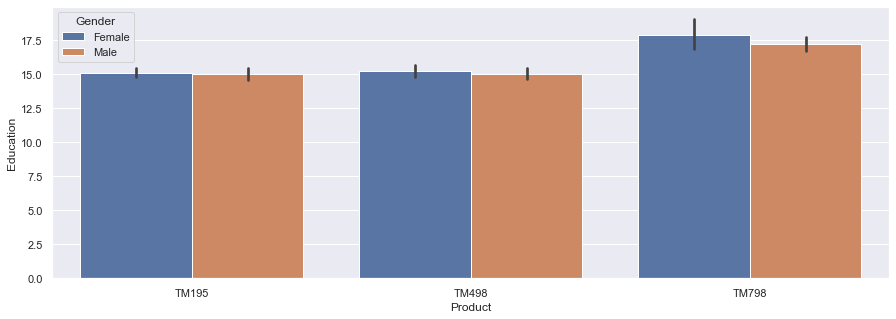

In [76]:
plt.figure(figsize=(15,5))
sns.barplot(data=project,x='Product',y='Education',hue='Gender')
plt.show()

**Observation**
* This barplot also shows that TM798 is still popular in the female customers with more years of education.

# Four Variables Analysis

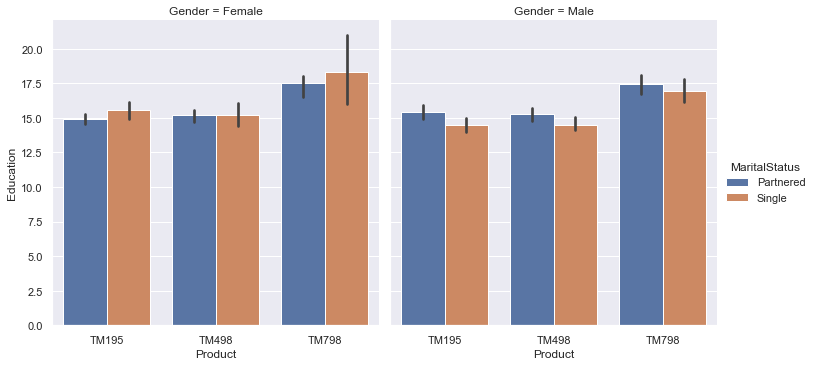

In [77]:
sns.catplot(x="Product", # X axis showing Product
               y = "Education", # Y axis showing Education
               hue="MaritalStatus", # Color showing Marital Status
               col="Gender", # Columns showing Gender
               data=project, # Data frame
               kind="bar"); # Type of Display

**Observations**
* Single Female customers with almost 18 years of education preffered TM798 model of the product
* Partnered Male customers on the other hand also preferred TM798
* Overall both partnered and single both preffered the product TM798 model. 

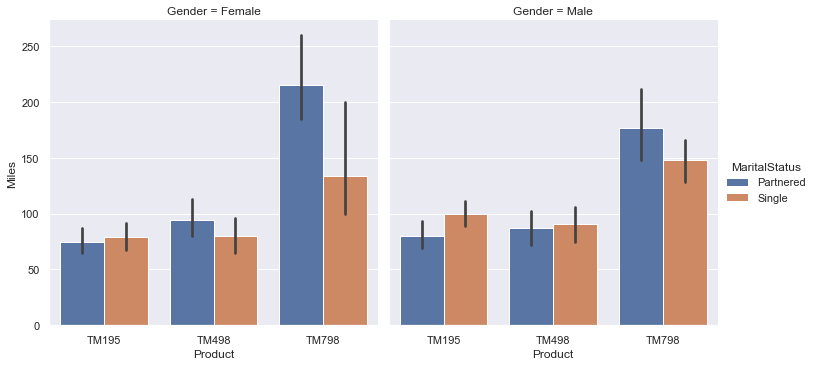

In [78]:
sns.catplot(x="Product", # X axis showing Product
               y = "Miles", # Y axis showing Miles
               hue="MaritalStatus", # Colors showing Marital Status
               col="Gender", # Columns showing Gender
               data=project, # Data frame
               kind="bar"); # Type of display

**Observations**
* Female and male partnered customers have higher miles to be run on Product TN798 

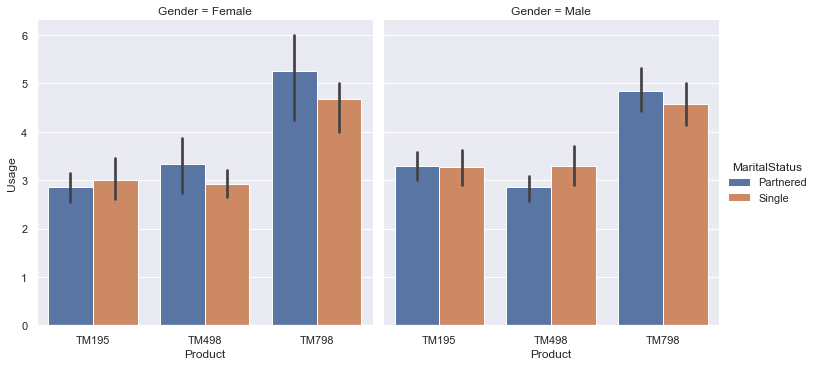

In [79]:
sns.catplot(x="Product", # X axis showing Product
               y = "Usage", # y axis showing 'Usage' variable
               hue="MaritalStatus", # Color showing marital Status
               col="Gender", # Columns showing Gender
               data=project, # Data frame
               kind="bar"); # Type of Display

**Observations**
* Partnered Male and Female have high usage of Product TM798

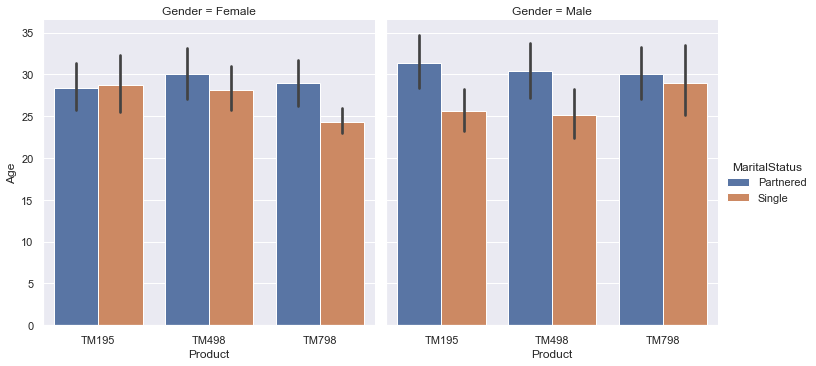

In [80]:
sns.catplot(x="Product", #X axis showing Products
               y = "Age",# Y axis  as Age variable
               hue="MaritalStatus", # Colors showing Marital Status
               col="Gender", # Columns showing Gender
               data=project, # Data frame
               kind="bar"); # Type of display

**Observations**
* Partnered Female and male of all age groups have higher tendency of using all three products

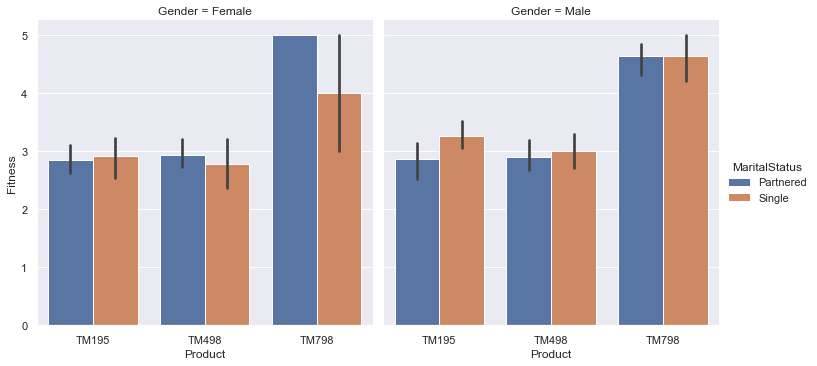

In [81]:
sns.catplot(x="Product", # X axis showing product
               y = "Fitness",# Analysing on the Fitness
               hue="MaritalStatus", #Colors showing Marital Status
               col="Gender", #Columns showing Gender
               data=project, # Data Source
               kind="bar");#Type of plot

**Observations**
* Partnered male and female have highly self rated TM798 product 

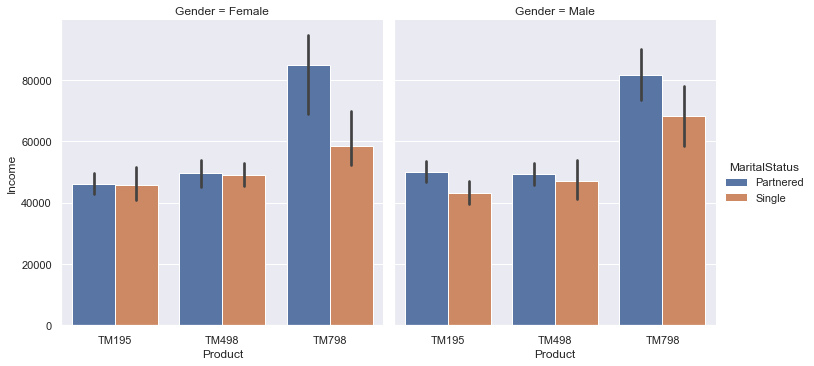

In [82]:
sns.catplot(x="Product", # X axis showing Products
               y = "Income", # Y axis showing Income 
               hue="MaritalStatus", # Colors showing Marital Status
               col="Gender", # Columns showing Gender
               data=project, # Data Frame
               kind="bar"); # Type of display

**Observations**
* Partnered male and female with higher income have more usage of product TM798

Text(0.5, 0, 'Product')

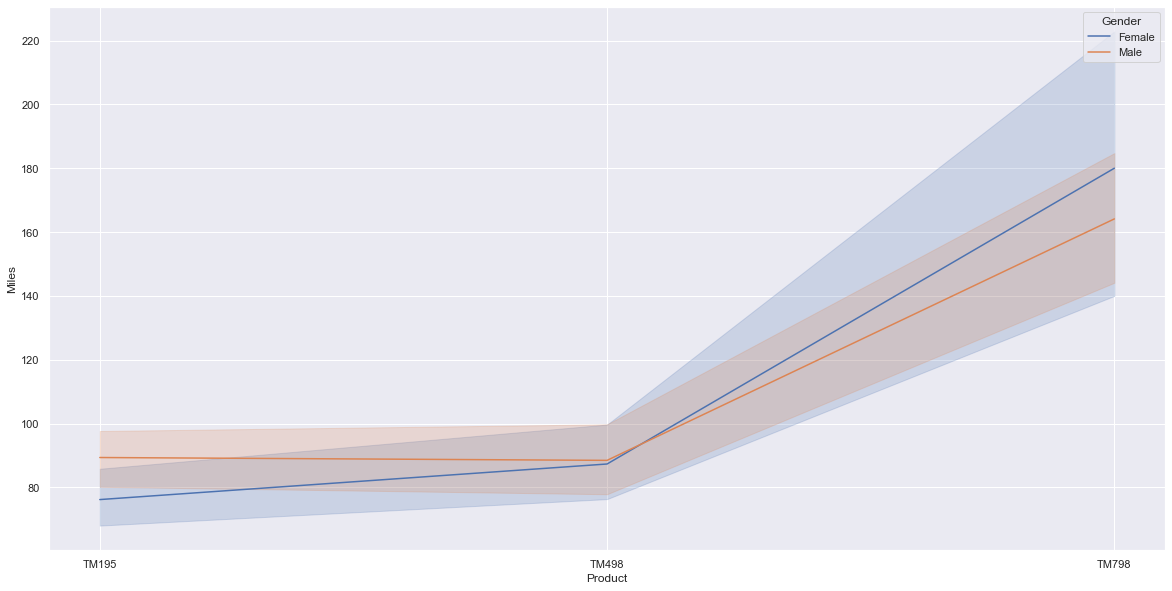

In [83]:
#Analyzing the relationsship amongst Gender,Product and Miles
plt.figure(figsize=(20,10))
sns.lineplot(x="Product", y="Miles", ci=95, data=project, hue='Gender')
plt.ylabel('Miles')# Title on Y Axis
plt.xlabel('Product')#Title on X axis 

**Observations**
* Female customers have reported more miles run on product TM798

Text(0.5, 0, 'Product')

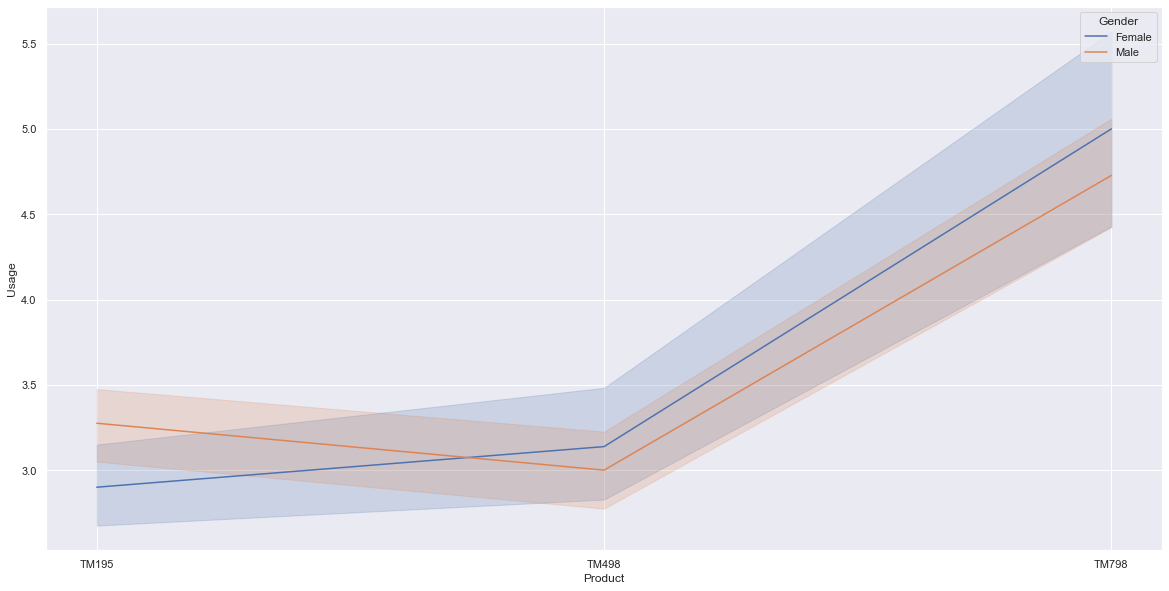

In [84]:
plt.figure(figsize=(20,10))
sns.lineplot(x="Product", y="Usage", ci=95, data=project, hue='Gender')
plt.ylabel('Usage')
plt.xlabel('Product')

# Recommendations

**Products and Recommendations**
* Product TM798:
Female prefer to buy this model. 
Most of the female expect to run more miles on this product.
Partnered female with high income are most likely to buy TM798.
* Product TM498:
Equally popular in both Partnered Genders.
* Product TM195:
Lower income partnered female customers more likely to buy TM195.
* 25 to 35 years old are more likely the customers that might buy the products.



# Pandas Profiling

In [85]:
import pandas_profiling

In [86]:
pandas_profiling.ProfileReport(project)

# Recommendations
Generate a set of insights and recommendations that will help the company in targeting new customers